<a href="https://colab.research.google.com/github/souhirbenamor/EPF/blob/main/RFE_Bridging_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/electricty_real_selected_data .xlsx')

df = df.set_index("Date") # define Date  as index

df.shape

(52608, 7)

In [5]:
X=df.iloc[:, 1:]
y=df.iloc[:, 0]

In [6]:
feature_names = list(X.columns.values)

In [7]:
print(X)

                         Demand DE     Wind   PV    Gas   Coal    CO2
Date                                                                 
2014-12-31 23:59:59.991   40242.25  8280.00  0.0  21.30  55.17   7.27
2015-01-01 00:59:59.991   39158.50  8412.75  0.0  21.30  55.17   7.27
2015-01-01 01:59:59.991   38824.50  8502.25  0.0  21.30  55.17   7.27
2015-01-01 02:59:59.991   38969.25  8668.50  0.0  21.30  55.17   7.27
2015-01-01 03:59:59.991   39092.75  8849.25  0.0  21.30  55.17   7.27
...                            ...      ...  ...    ...    ...    ...
2020-12-31 18:59:59.980   49516.00  8053.50  0.0  19.12  56.49  32.59
2020-12-31 19:59:59.980   47747.50  7456.50  0.0  19.12  56.49  32.59
2020-12-31 20:59:59.980   47761.75  6902.50  0.0  19.12  56.49  32.59
2020-12-31 21:59:59.980   46222.50  6395.00  0.0  19.12  56.49  32.59
2020-12-31 22:59:59.980   43520.50  4633.50  0.0  19.12  56.67  32.59

[52608 rows x 6 columns]


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import rfecv
from yellowbrick.datasets import load_credit

# Load classification dataset


cv = StratifiedKFold(5)
visualizer = rfecv(RandomForestClassifier(), X=X, y=y, cv=cv, scoring='f1_weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


**https://www.blog.trainindata.com/recursive-feature-elimination-with-python/**


In [75]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 18.8 MB/s 


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from feature_engine.selection import RecursiveFeatureElimination

In [77]:
model = GradientBoostingRegressor(
    n_estimators=5,
    random_state=10,
)

In [104]:
X=df.iloc[:, 1:]
y=df.iloc[:, 0]
X_train = X[:-17640]; X_test = X[-17640:]
y_train = y[:-17640]; y_test = y[-17640:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((34968, 6), (34968,), (17640, 6), (17640,))

In [106]:
y

Date
2014-12-31 23:59:59.991    18.29
2015-01-01 00:59:59.991    16.04
2015-01-01 01:59:59.991    14.60
2015-01-01 02:59:59.991    14.95
2015-01-01 03:59:59.991    14.50
                           ...  
2020-12-31 18:59:59.980    56.70
2020-12-31 19:59:59.980    52.44
2020-12-31 20:59:59.980    51.86
2020-12-31 21:59:59.980    52.26
2020-12-31 22:59:59.980    50.87
Name: price day ahead real, Length: 52608, dtype: float64

In [79]:
RFE_model = RecursiveFeatureElimination(
    estimator = model, # the ML model
    scoring = 'r2', 
    threshold = 0.001, 
    cv=2,
)

RFE_model.fit(X_train, y_train)

RecursiveFeatureElimination(cv=2,
                            estimator=GradientBoostingRegressor(n_estimators=5,
                                                                random_state=10),
                            scoring='r2', threshold=0.001)

In [87]:
Importances = RFE_model.feature_importances_
print(Importances)

Coal         0.000000
PV           0.030799
Gas          0.110139
CO2          0.114959
Wind         0.322940
Demand DE    0.421163
dtype: float64


In [91]:
RFE_model.initial_model_performance_,

(-0.034686029123249806,)

In [93]:
RFE_model.features_to_drop_

['PV', 'Coal']

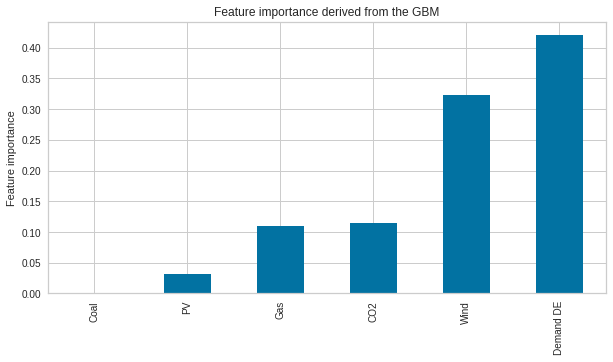

In [81]:
RFE_model.feature_importances_.plot.bar(figsize=(10, 5))
plt.ylabel('Feature importance')
plt.title('Feature importance derived from the GBM')
plt.show()

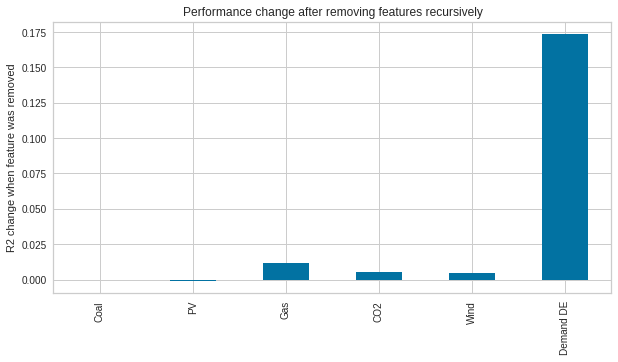

In [82]:
pd.Series(RFE_model.performance_drifts_).plot.bar(figsize=(10, 5))
plt.title('Performance change after removing features recursively')
plt.ylabel('R2 change when feature was removed')
plt.show()

In [84]:
X_train_t = RFE_model.transform(X_train)
X_test_t = RFE_model.transform(X_test)

In [85]:
X_train_t

,Demand DE,Wind,Gas,CO2
Date,,,,
2014-12-31 23:59:59.991,40242.250000,8280.00,21.30,7.27
2015-01-01 00:59:59.991,39158.500000,8412.75,21.30,7.27
2015-01-01 01:59:59.991,38824.500000,8502.25,21.30,7.27
2015-01-01 02:59:59.991,38969.250000,8668.50,21.30,7.27
2015-01-01 03:59:59.991,39092.750000,8849.25,21.30,7.27
...,...,...,...,...
2018-12-27 18:59:59.983,56407.161008,10002.75,23.32,24.73
2018-12-27 19:59:59.983,53666.412449,9914.25,23.32,24.73
2018-12-27 20:59:59.983,51393.678092,9851.25,23.32,24.73


**https://towardsdatascience.com/powerful-feature-selection-with-recursive-feature-elimination-rfe-of-sklearn-23efb2cdb54e**

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature, target arrays
X, y = df.iloc[:, 1:], df.iloc[:, 0]

# Train/test set generation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1121218
)

# Scale train and test sets with StandardScaler
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

# Fix the dimensions of the target array
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Init, fit, test Lasso Regressor
forest = RandomForestRegressor()
_ = forest.fit(X_train_std, y_train)
forest.score(X_test_std, y_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.9148072655312411

In [121]:
y

Date
2014-12-31 23:59:59.991    18.29
2015-01-01 00:59:59.991    16.04
2015-01-01 01:59:59.991    14.60
2015-01-01 02:59:59.991    14.95
2015-01-01 03:59:59.991    14.50
                           ...  
2020-12-31 18:59:59.980    56.70
2020-12-31 19:59:59.980    52.44
2020-12-31 20:59:59.980    51.86
2020-12-31 21:59:59.980    52.26
2020-12-31 22:59:59.980    50.87
Name: price day ahead real, Length: 52608, dtype: float64

In [122]:
pd.DataFrame(
    zip(X_train.columns, abs(forest.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)

,feature,weight
0,Coal,0.092584
1,CO2,0.104895
2,PV,0.110173
3,Gas,0.111114
4,Wind,0.261197
5,Demand DE,0.320037


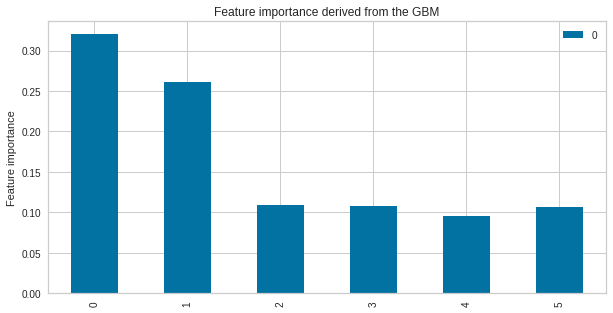

In [115]:
pd.DataFrame(forest.feature_importances_).plot.bar(figsize=(10, 5))
plt.ylabel('Feature importance')
plt.title('Feature importance derived from the GBM')
plt.show()